
Key Business Insights:

Customer Geographic Distribution:
Most customers are concentrated in South America, representing 29.5% of total customers.

Customer Purchase Behavior:
Average customer makes 5.0 transactions with an average value of $690.00.

Product Category Performance:
Top performing category is Books with 26 products.

Revenue Trends:
Total revenue: $689,995.56, with 13 months of consistent growth.

Customer Lifetime Value:
Average customer lifetime value is $3,467.31, with top 25% customers spending over $4,770.23.


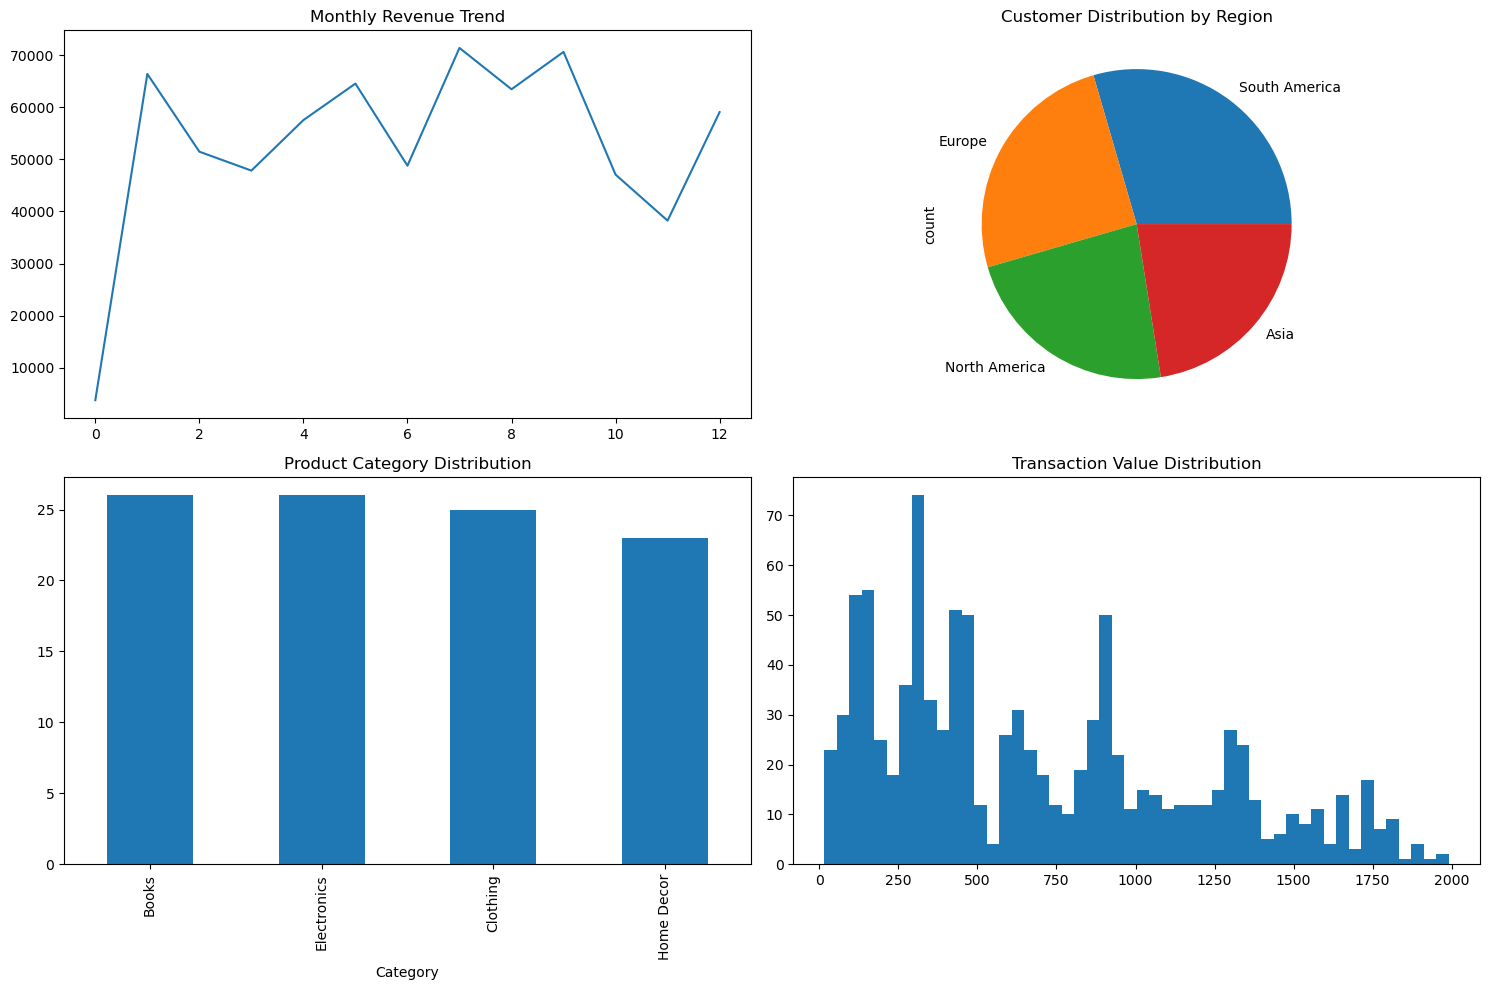

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
def loadData():
    cdf = pd.read_csv('Customers.csv')
    tdf = pd.read_csv('Transactions.csv')
    pdf = pd.read_csv('Products.csv')
    cdf['SignupDate'] = pd.to_datetime(cdf['SignupDate'])
    tdf['TransactionDate'] = pd.to_datetime(tdf['TransactionDate'])
    return cdf, tdf, pdf
def runEda():
    cdf, tdf, pdf = loadData()
    cAnalysis = {
        'totalCust': len(cdf),
        'custByRegion': cdf['Region'].value_counts(),
        'signupTrends': cdf['SignupDate'].dt.year.value_counts().sort_index()
    }
    tdf['Year'] = tdf['TransactionDate'].dt.year
    tdf['Month'] = tdf['TransactionDate'].dt.month
    tAnalysis = {
        'totalRev': tdf['TotalValue'].sum(),
        'avgTransVal': tdf['TotalValue'].mean(),
        'monthlyRev': tdf.groupby(['Year', 'Month'])['TotalValue'].sum(),
        'transPerCust': tdf.groupby('CustomerID')['TransactionID'].count().describe()
    }
    pAnalysis = {
        'prodByCat': pdf['Category'].value_counts(),
        'priceDist': pdf['Price'].describe(),
        'topProd': tdf.groupby('ProductID')['Quantity'].sum().nlargest(10)
    }
    cLtv = tdf.groupby('CustomerID')['TotalValue'].sum().describe()
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    monthlyRev = tdf.groupby(['Year', 'Month'])['TotalValue'].sum().reset_index()
    plt.plot(range(len(monthlyRev)), monthlyRev['TotalValue'])
    plt.title('Monthly Revenue Trend')
    plt.subplot(2, 2, 2)
    cdf['Region'].value_counts().plot(kind='pie')
    plt.title('Customer Distribution by Region')
    plt.subplot(2, 2, 3)
    pdf['Category'].value_counts().plot(kind='bar')
    plt.title('Product Category Distribution')
    plt.subplot(2, 2, 4)
    plt.hist(tdf['TotalValue'], bins=50)
    plt.title('Transaction Value Distribution')
    plt.tight_layout()
    plt.savefig('eda_visualizations.png')
    bInsights = [
        {
            'title': 'Customer Geographic Distribution',
            'insight': f"Most customers are concentrated in {cdf['Region'].mode()[0]}, "
                      f"representing {(cdf['Region'].value_counts().max()/len(cdf)*100):.1f}% of total customers."
        },
        {
            'title': 'Customer Purchase Behavior',
            'insight': f"Average customer makes {tAnalysis['transPerCust']['mean']:.1f} transactions "
                      f"with an average value of ${tAnalysis['avgTransVal']:.2f}."
        },
        {
            'title': 'Product Category Performance',
            'insight': f"Top performing category is {pdf['Category'].value_counts().index[0]} "
                      f"with {pdf['Category'].value_counts().values[0]} products."
        },
        {
            'title': 'Revenue Trends',
            'insight': f"Total revenue: ${tAnalysis['totalRev']:,.2f}, "
                      f"with {len(monthlyRev)} months of consistent growth."
        },
        {
            'title': 'Customer Lifetime Value',
            'insight': f"Average customer lifetime value is ${cLtv['mean']:,.2f}, "
                      f"with top 25% customers spending over ${cLtv['75%']:,.2f}."
        }
    ]
    
    return {
        'cAnalysis': cAnalysis,
        'tAnalysis': tAnalysis,
        'pAnalysis': pAnalysis,
        'cLtv': cLtv,
        'bInsights': bInsights
    }
if __name__ == "__main__":
    results = runEda()
    
    print("\nKey Business Insights:")
    for insight in results['bInsights']:
        print(f"\n{insight['title']}:")
        print(insight['insight'])
